# Regresion Lasso y Ridge

$$ y = Ax + b $$

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [7]:
session = tf.Session()
iris = datasets.load_iris()

In [18]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [19]:
batch_size = 50
learning_rate = 0.001

In [27]:
x_data = tf.placeholder(shape = [None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$\sum\frac{(y_r-y_p)^2}{n} \frac{99.0}{1+e^{-100(A-0.9)}}$$

In [28]:
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1.0, tf.add(1.0, tf.exp(tf.multiply(-100.0, tf.subtract(A, lasso_param)))))
regularization_params = tf.multiply(heavyside_step, 99.0)
loss = tf.add(tf.reduce_mean(tf.square(y_target - y_pred)), regularization_params)

In [29]:
init = tf.global_variables_initializer()
session.run(init)

In [30]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss)

In [31]:
loss_vec = []
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if(i+1)%100 == 0:
        print("Paso #"+str(i+1)+"A = "+str(session.run(A))+", b = "+str(session.run(b))+
             "Loss: "+str(temp_loss))

Paso #100A = [[0.83077645]], b = [[-0.06248142]]Loss: [[24.067513]]
Paso #200A = [[0.83175707]], b = [[0.8263484]]Loss: [[16.744787]]
Paso #300A = [[0.82823324]], b = [[1.5543346]]Loss: [[11.638754]]
Paso #400A = [[0.82711196]], b = [[2.152967]]Loss: [[7.6277647]]
Paso #500A = [[0.82426125]], b = [[2.6428063]]Loss: [[5.264902]]
Paso #600A = [[0.8223046]], b = [[3.0444274]]Loss: [[3.6633232]]
Paso #700A = [[0.82180095]], b = [[3.3737612]]Loss: [[2.4947288]]
Paso #800A = [[0.8191297]], b = [[3.6430948]]Loss: [[1.8492973]]
Paso #900A = [[0.8178166]], b = [[3.8662543]]Loss: [[1.387132]]
Paso #1000A = [[0.814758]], b = [[4.046611]]Loss: [[0.7899543]]
Paso #1100A = [[0.8136741]], b = [[4.195861]]Loss: [[0.6702617]]
Paso #1200A = [[0.8110258]], b = [[4.318116]]Loss: [[0.47616458]]
Paso #1300A = [[0.8095845]], b = [[4.4188104]]Loss: [[0.42797282]]
Paso #1400A = [[0.80789113]], b = [[4.5012217]]Loss: [[0.2670275]]
Paso #1500A = [[0.8055493]], b = [[4.5680556]]Loss: [[0.18871765]]
Paso #1600A = 

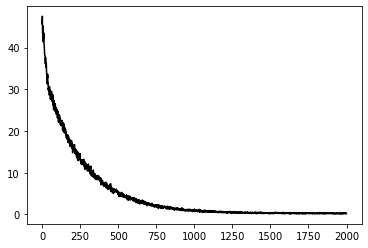

In [32]:
plt.plot(loss_vec, 'k-')

In [33]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(slope) + "x+"+str(intercept))

0.7990732x+4.7678804


In [34]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

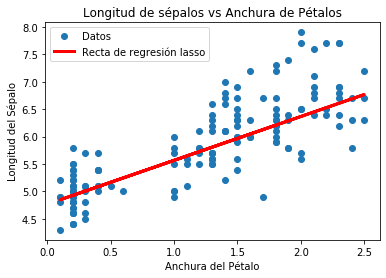

In [35]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión lasso", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

# Regresión Ridge
$$\sum\frac{(y_r-y_p)^2}{n}+ridge_p\cdot A^2$$

In [ ]:
ridge_params = tf.constant(1.0)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target-y_pred)), tf.multiply(ridge_params, ridge_loss)),0)